# Exercise 04 - Due Friday, October 21 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

In [1]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-24 00:00:39--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.1s   

2016-10-24 00:00:40 (44.5 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

In [2]:
!mv abq-food-inspections-fy2010.csv fy.csv

In [3]:
!wc -l fy.csv

17557 fy.csv


# What do all the columns mean?

Based on the metadata information, columns 1-15 describe attributes of the facility such as the basic information like address and type of business. Columns 15 and 16 describe the type of facility permit/ID code the inspection was performed. And the rest of the columns entail details of the inspection method, result, action and violation, if any. 

In [4]:
!csvcut -n fy.csv

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO


In [5]:
!head fy.csv | csvlook

|--------------------------+--------------+-------------------------------+-------------+-------+-------+-----------+-------------------------+--------------------+---------------+-------------+-------------+------------------+------------+------------------+------------------------------+---------------------+-----------------+-------------------------+------------+-------------+-------------+-------------+----------------+----------------+----------------------------------+------------------|
|  FACILITY_NAME           | FACILITY_KEY | SITE_ADDRESS                  | CITY        | STATE | ZIP   | OWNER_KEY | OWNER_NAME              | NATURE_OF_BUSINESS | STREET_NUMBER | STREET_NAME | STREET_TYPE | POST_DIRECTIONAL | PHONE      | PROGRAM_CATEGORY | PROGRAM_CATEGORY_DESCRIPTION | INSPECTION_DATE     | INSPECTION_TYPE | INSPECTION_DESC         | SERIAL_NUM | ACTION_CODE | ACTION_DESC | RESULT_CODE | RESULT_DESC    | VIOLATION_CODE | VIOLATION_DESC                   | INSPECTION_MEMO  |


In [6]:
!shuf -n 10000 fy.csv | csvstat

  1. PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR
	<class 'str'>
	Nulls: False
	Unique values: 2455
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	77
		ISOTOPES PARK - OVATIONS:	55
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	46
		ECHO INC:	46
		OOB MOM THAI FOOD:	42
	Max length: 77
  2. 65863
	<class 'str'>
	Nulls: False
	Unique values: 2658
	5 most frequent values:
		46323:	55
		80949:	46
		65863:	46
		93519:	42
		32817:	40
	Max length: 12
  3. 644 OLD COORS BLVD SW 
	<class 'str'>
	Nulls: True
	Unique values: 2333
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	55
		644 OLD COORS BLVD SW:	46
		300 MENAUL NW:	46
		2200 SUNPORT BLVD SE:	44
		1212 SAN PEDRO DR SE:	42
	Max length: 35
  4. ALBUQUERQUE
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE, CITY
  5. NM
	<class 'str'>
	Nulls: False
	Values: 87, STATE, NM
  6. 87105
	<class 'str'>
	Nulls: False
	Unique values: 49
	5 most frequent values:
		87110:	1149
		87108:	1091
		87102:	918
		87106:	884
		87109:	

### Are there null values?  

Based on observations from above, columns 3,9, 10, 11, 13, 14, 16, 25, 26, 27 all have null values. The next few lines of code show what the data might look like for those columns with null values. 


### Which columns interest you the most?

I am mostly interested in the columns that contain details of the inspection results and descriptions.

 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC

### Which columns present some complications or questions you would like to ask?

1. Some of them may not be of great concern, such as inspection_memo. It is possible that no additional information is available. Some others are of minor concerns. Nature of business, for example, should all have an entry to describe the nature of the business. 
2. It is, however, more of an issue when there is missing value for business contact information such as site address, street name, phone number etc. This causes concerns because data should be available but is not, which could be due to human error. 
3. If both violation code and description are missing then it is possible that the business had no violations at all. If either is missing withe other present, then it is a concern. 
4. Addtionally I would be interested in finding out if there is any relationship or pattern that can be discovered among inspection violations and the type of business, type of inspection, etc. For example, does one time of business have a tendency to have more violations versus the others? Is there higher occurence of violations around certain time of the year?


In [7]:
!csvcut -c3,9,10,11,13 fy.csv| head -10 |csvlook

|--------------------------------+--------------------+---------------+-------------+-------------------|
|  SITE_ADDRESS                  | NATURE_OF_BUSINESS | STREET_NUMBER | STREET_NAME | POST_DIRECTIONAL  |
|--------------------------------+--------------------+---------------+-------------+-------------------|
|  10200 GOLF COURSE RD NW STE B | CAKE DECORATING    | 10200         | GOLF COURSE | NW                |
|  10200 GOLF COURSE RD NW STE B | CAKE DECORATING    | 10200         | GOLF COURSE | NW                |
|  10200 GOLF COURSE RD NW STE B | CAKE DECORATING    | 10200         | GOLF COURSE | NW                |
|  10200 GOLF COURSE RD NW STE B | CAKE DECORATING    | 10200         | GOLF COURSE | NW                |
|  10200 GOLF COURSE RD NW STE B | CAKE DECORATING    | 10200         | GOLF COURSE | NW                |
|  601 SAN MATEO BLVD SE         | RESTAURANT         | 601           | SAN MATEO   | SE                |
|  601 SAN MATEO BLVD SE         | RESTAURANT 

In [8]:
!csvcut -c14,16,25,26,27  fy.csv| head -10 |csvlook

|-------------+------------------------------+----------------+----------------------------------+------------------|
|  PHONE      | PROGRAM_CATEGORY_DESCRIPTION | VIOLATION_CODE | VIOLATION_DESC                   | INSPECTION_MEMO  |
|-------------+------------------------------+----------------+----------------------------------+------------------|
|  5058339563 | Food Processor               |     68         | Delivered Informational Brochure |                  |
|  5058339563 | Food Processor               |     00         | No Violations Found              |                  |
|  5058339563 | Food Processor               |     55         | Additional Comments              |                  |
|  5058339563 | Food Processor               |     00         | No Violations Found              |                  |
|  5058339563 | Food Processor               |     55         | Additional Comments              |                  |
|  5052320900 | Food Service Establishment   |     34   

## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

In [9]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [10]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [11]:
!createdb -U dbuser week7

In [12]:
%sql postgresql://dbuser@localhost:5432/week7

'Connected: dbuser@week7'

In [13]:
%%sql
DROP TABLE IF EXISTS inspection;
CREATE TABLE inspection (
    FACILITY_NAME CHAR(200),
    FACILITY_KEY INTEGER,
    SITE_ADDRESS CHAR(50),
    CITY CHAR(30),
    STATE CHAR(2),
    ZIP CHAR(10),
    OWNER_KEY INTEGER,
    OWNER_NAME CHAR(200),
    NATURE_OF_BUSINESS CHAR(32),
    STREET_NUMBER CHAR(32),
    STREET_NAME CHAR(32),
    STREET_TYPE CHAR(50),
    POST_DIRECTIONAL CHAR(200),
    PHONE CHAR(20),
    PROGRAM_CATEGORY CHAR(20),
    PROGRAM_CATEGORY_DESCRIPTION CHAR(200),
    INSPECTION_DATE TIMESTAMP,
    INSPECTION_TYPE CHAR(20),
    INSPECTION_DESC CHAR(200),
    SERIAL_NUM CHAR(10),
    ACTION_CODE INTEGER,
    ACTION_DESC CHAR(60),
    RESULT_CODE INTEGER,
    RESULT_DESC CHAR(200),
    VIOLATION_CODE CHAR(32),
    VIOLATION_DESC CHAR(200),
    INSPECTION_MEMO CHAR(20)
    )

Done.
Done.


[]

In [14]:
!pwd

/home/jovyan/work


In [15]:
%%sql
COPY inspection FROM '/home/jovyan/work/fy.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

17556 rows affected.


[]

Double checking to make sure all the data was moved over corrrectly. 

In [16]:
%%sql
SELECT COUNT(*) FROM inspection;

1 rows affected.


count
17556


## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

# Extracting a schema from a pgsql instance . Checking to see which columns have null values

In [17]:
%%sql
SELECT column_name, data_type, character_maximum_length, is_nullable
FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'inspection';

27 rows affected.


column_name,data_type,character_maximum_length,is_nullable
facility_name,character,200,YES
facility_key,integer,None,YES
site_address,character,50,YES
city,character,30,YES
state,character,2,YES
zip,character,10,YES
owner_key,integer,None,YES
owner_name,character,200,YES
nature_of_business,character,32,YES
street_number,character,32,YES


### Getting the top 10 facilities with the most violations

In [88]:
%%sql
SELECT facility_name, count( violation_code) as total_violation
FROM inspection
group by facility_name
order by total_violation desc
LIMIT 10;

10 rows affected.


facility_name,total_violation
SMITHS FOOD AND DRUG CENTERS INC,149
ISOTOPES PARK - OVATIONS,93
PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR,85
ISLETA AMPHITHEATER,68
ECHO INC,68
DIONS PIZZA,66
CIRCLE K 8936,65
TALIN MARKET WORLD FOOD FARE,64
OOB MOM THAI FOOD,61
CIRCLE K 8940,61


#### Total number of violations

In [19]:
%%sql
select count(violation_code) 
from inspection;

1 rows affected.


count
16548


## The top 10 most frequently occured violations with graph to illustrate.

In [20]:
%%sql
select violation_desc, count(violation_code) as total_occurence
from inspection
where violation_desc not in ('No Violations Found', 'Additional Comments', 'Delivered Informational Brochure')
group by violation_desc
order by total_occurence desc
limit 10;

10 rows affected.


violation_desc,total_occurence
Plumbing: Improperly installed/maintained/supplied,492
Non-Food contact surfaces,446
Improper sanitizing,434
Food unprotected,425
"Floors, Walls, Ceilings",406
Food contact surfaces,251
Cold Holding,201
"Thermometers not provided, not accurate/consp",183
Hot Holding,175
Other Operations - Lighting,142


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<Container object of 10 artists>

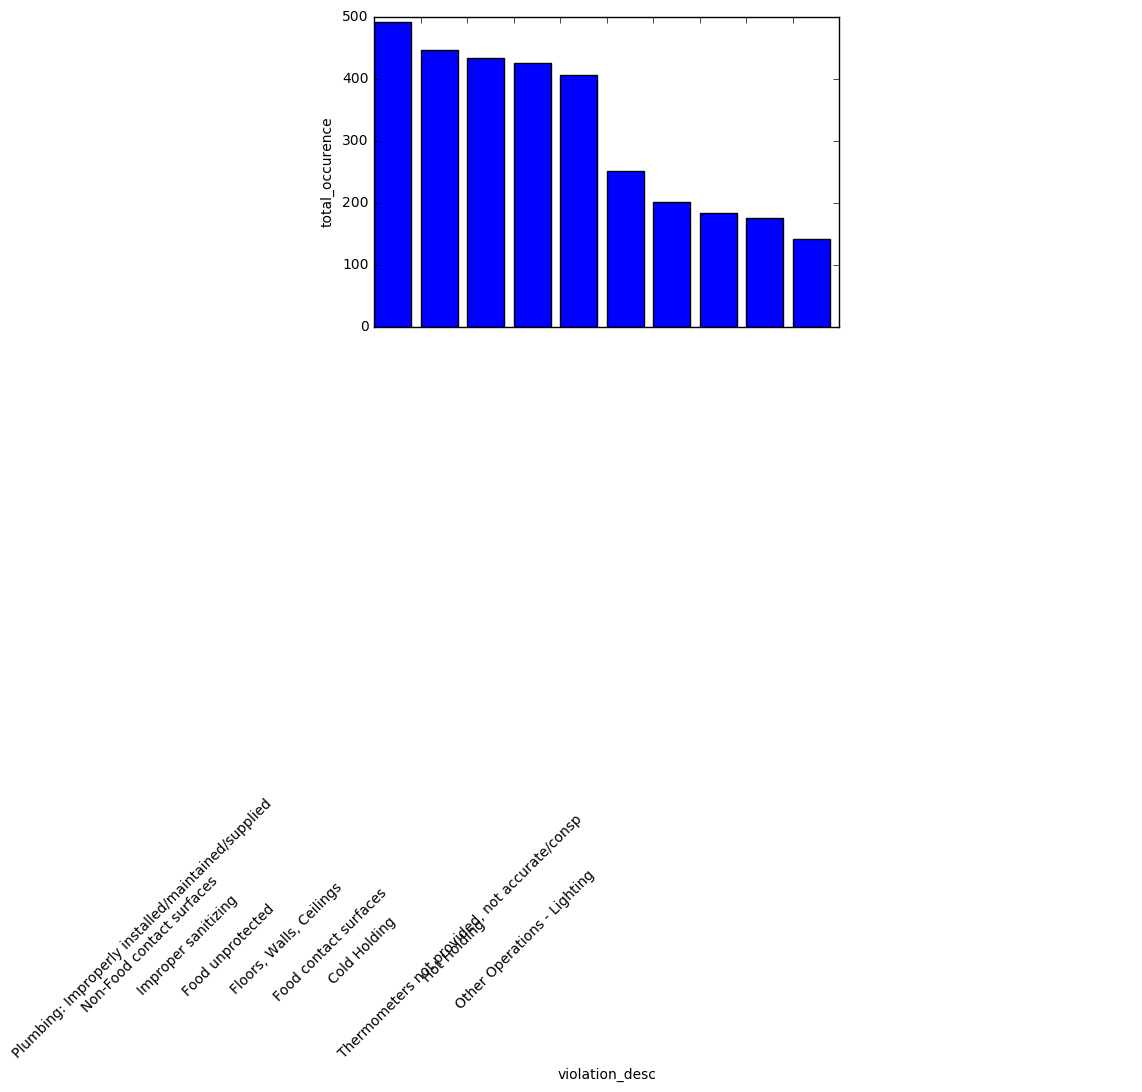

In [21]:
%matplotlib inline
result = _
result.bar()

## Total number count of no violations.

In [22]:
%%sql
select violation_desc, count(violation_code) as total_occurence
from inspection
where violation_desc = 'No Violations Found'
group by violation_desc;

1 rows affected.


violation_desc,total_occurence
No Violations Found,3434


#### CUBE generates summaries for the entire set of attributes and its possible subsets. It seems like "None" is still included in the result because it is used in the group by statement that includes all three columns, facility and owner names and violation_desc. The other filters did seem to work as the description didn't include no violations found etc. Some of the values are null for facility/owner names. This could generate issues from query as information is not available for one or the other or even both, in some scenarios. The challenge is consistent with the null value challenges discussed above. 

In [83]:
%%sql
SELECT distinct facility_name, owner_name, violation_desc, COUNT(*) AS total_count
FROM inspection
where violation_desc not in ('No Violations Found', 'Additional Comments', 'None', 'Delivered Informational Brochure')
GROUP BY CUBE (facility_name, owner_name, violation_desc)
HAVING COUNT(*) > 300;

6 rows affected.


facility_name,owner_name,violation_desc,total_count
None,None,Food unprotected,425
None,None,Improper sanitizing,434
None,None,"Floors, Walls, Ceilings",406
None,None,None,5103
None,None,Plumbing: Improperly installed/maintained/supplied,492
None,None,Non-Food contact surfaces,446


# Extract dates from inspection date to examine the relationship, if any, with having an inspection done. Determining if this could be a cyclical effect, with certain months having more inspection violations more than others.

In [38]:
%%sql
SELECT EXTRACT(DAY FROM inspection_date), EXTRACT(MONTH FROM inspection_date), EXTRACT(YEAR FROM inspection_date)
FROM inspection
LIMIT 10;

10 rows affected.


date_part,date_part_1,date_part_2
22.0,9.0,2009.0
21.0,10.0,2009.0
24.0,7.0,2009.0
21.0,10.0,2009.0
21.0,10.0,2009.0
14.0,4.0,2010.0
14.0,4.0,2010.0
23.0,3.0,2010.0
23.0,3.0,2010.0
23.0,3.0,2010.0


In [56]:
%%sql
SELECT TO_CHAR(inspection_date, 'YYYY-MM-DD') AS day_of_year, 
    TO_CHAR(inspection_date, 'YYYY') AS year,
    TO_CHAR(inspection_date, 'MM') AS month,
    TO_CHAR(inspection_date, 'DD') AS day,
    TO_CHAR(inspection_date, 'Day') AS day_of_week_str,
    TO_CHAR(inspection_date, 'D') AS day_of_week,
    CASE WHEN CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) >= 6 
        THEN 1 
        ELSE 0
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) < 6 
        THEN 1 
        ELSE 0
    END AS is_weekday,
    TO_CHAR(inspection_date, 'HH24') AS hour_24,
    TO_CHAR(inspection_date, 'Q') AS quarter,
    inspection_desc as inspection_desc
FROM inspection
LIMIT 10;

10 rows affected.


day_of_year,year,month,day,day_of_week_str,day_of_week,is_weekend,is_weekday,hour_24,quarter,inspection_desc
2009-10-21,2009,10,21,Wednesday,4,0,1,00,4,ROUTINE FOOD INSPECTION
2009-10-21,2009,10,21,Wednesday,4,0,1,00,4,ROUTINE FOOD INSPECTION
2010-04-14,2010,04,14,Wednesday,4,0,1,00,2,ROUTINE FOOD INSPECTION
2010-04-14,2010,04,14,Wednesday,4,0,1,00,2,ROUTINE FOOD INSPECTION
2010-03-23,2010,03,23,Tuesday,3,0,1,00,1,ROUTINE FOOD INSPECTION
2010-03-23,2010,03,23,Tuesday,3,0,1,00,1,ROUTINE FOOD INSPECTION
2010-03-23,2010,03,23,Tuesday,3,0,1,00,1,ROUTINE FOOD INSPECTION
2009-12-15,2009,12,15,Tuesday,3,0,1,00,4,EMERGENCY RESPONSE
2009-12-15,2009,12,15,Tuesday,3,0,1,00,4,ROUTINE FOOD INSPECTION
2009-12-15,2009,12,15,Tuesday,3,0,1,00,4,ROUTINE FOOD INSPECTION


In [63]:
%%sql
DROP TABLE IF EXISTS days;
CREATE TABLE days_inspec (
    id SERIAL,
    day_of_year CHAR(10),
    year INTEGER,
    month INTEGER,
    day INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN,
    hour_24 INTEGER,
    quarter INTEGER,
    inspection_desc char(50)
);

Done.
Done.


[]

In [65]:
%%sql
INSERT INTO days_inspec (day_of_year, year, month, day, day_of_week_str, day_of_week,
                  is_weekend, is_weekday, hour_24, quarter, inspection_desc)
SELECT DISTINCT TO_CHAR( inspection_date, 'YYYY-MM-DD') AS day_of_year, 
    CAST(TO_CHAR( inspection_date, 'YYYY') AS INTEGER) AS year,
    CAST(TO_CHAR( inspection_date, 'MM') AS INTEGER) AS month,
    CAST(TO_CHAR( inspection_date, 'DD') AS INTEGER) AS day,
    TO_CHAR( inspection_date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR( inspection_date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR( inspection_date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR( inspection_date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR( inspection_date, 'HH24') AS INTEGER) AS hour_24,
    CAST(TO_CHAR( inspection_date, 'Q') AS INTEGER) AS quarter,
    inspection_desc as inspection
FROM inspection;

1204 rows affected.


[]

In [70]:
%%sql
select * from days_inspec limit 10;

10 rows affected.


id,day_of_year,year,month,day,day_of_week_str,day_of_week,is_weekend,is_weekday,hour_24,quarter,inspection_desc
1,2010-04-12,2010,4,12,Monday,2,False,True,0,2,ADDITIONAL SERVICE PROVIDED
2,2009-12-04,2009,12,4,Friday,6,False,True,0,4,EMERGENCY RESPONSE
3,2010-05-26,2010,5,26,Wednesday,4,False,True,0,2,New Business Inspection
4,2009-10-23,2009,10,23,Friday,6,False,True,0,4,ROUTINE FOOD INSPECTION
5,2010-01-15,2010,1,15,Friday,6,False,True,0,1,MANAGERIAL ASSISTANCE
6,2010-06-18,2010,6,18,Friday,6,False,True,0,2,MANAGERIAL ASSISTANCE
7,2009-12-01,2009,12,1,Tuesday,3,False,True,0,4,New Business Inspection
8,2009-08-14,2009,8,14,Friday,6,False,True,0,3,FOOD FOLLOW-UP INSPECTION
9,2010-01-22,2010,1,22,Friday,6,False,True,0,1,New Business Inspection
10,2010-03-08,2010,3,8,Monday,2,False,True,0,1,PHONE CALL


In [80]:
%%sql
select month, count(*) as total_count
from days_inspec
where inspection_desc not in ('No Violations Found', 'None','Additional Comments', 'None', 'Delivered Informational Brochure')
group by month
order by total_count desc
limit 10;

10 rows affected.


month,total_count
12,262
9,246
10,238
11,216
1,206
3,202
8,198
7,184
6,182
4,172


<Container object of 10 artists>

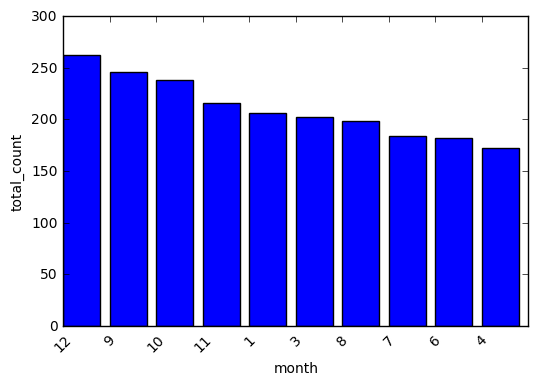

In [81]:
%matplotlib inline
result = _
result.bar()

### Counting total actual violations by categories. This provides top level information about the top 10 category that have the most violations.

In [77]:
%%sql
SELECT PROGRAM_CATEGORY_DESCRIPTION, count( violation_desc) as total_violation
FROM inspection
where violation_desc not in ('No Violations Found', 'None','Additional Comments', 'None', 'Delivered Informational Brochure')
group by PROGRAM_CATEGORY_DESCRIPTION
order by total_violation desc
LIMIT 10;

10 rows affected.


program_category_description,total_violation
Food Service Establishment,2883
Retail - Self Service & Prepackage Foods,406
Retail -Grocery,240
Childcare,185
Bar,169
Retail - Prepackage Only,158
School,133
Limited Menu,114
Retail - Deli,114
Bakery,107


## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table

# This section intends to extract facility name/key and owner name/key to normalize in a different dataset then add it back to the original dataset

In [27]:
%%sql
SELECT DISTINCT facility_name, facility_key
FROM inspection
ORDER BY facility_name
limit 10;

10 rows affected.


facility_name,facility_key
00BSAY IT WITH CAKE,50534
2000 VIETNAM RESTAURANT,31468
328 CHINESE CUISINE,72789
5 STAR BURGERS,90929
66 DINER,7820
7 BAR ELEMENTARY SCHOOL,2207
7 ELEVEN,21347
7 ELEVEN 57722,21346
7 ELEVEN 700,21348
7 ELEVEN 702,21350


In [28]:
%%sql
SELECT DISTINCT owner_name, owner_key
FROM inspection
ORDER BY owner_name
limit 10;

10 rows affected.


owner_name,owner_key
110 SUNPORT LLC,80806
1ST CLASS LEARNING CENTER,39984
2000 VIETMAN RESTAURANT,29294
21ST CENTURY PUBLIC ACADEMY,65277
300 CLUB GRILL,80954
328 CHINESE CUISINE,66644
3RD ALARM COFFEE,67195
5 STAR ABQ INC,82383
6001 INC,15660
66 DINER,6743


In [29]:
%%sql
SELECT Business_name, Business_id
FROM (
    SELECT DISTINCT facility_name as business_name, facility_key AS business_id FROM inspection
    UNION
    SELECT DISTINCT owner_name as business_name, owner_key AS business_id FROM inspection
    ) AS d
LIMIT 10;

10 rows affected.


business_name,business_id
OOB SPECIALTY HOSPITAL OF ALBUQUER,91957
QUIZNOS SUB 12316,82796
QUALITY INN UNIVERSITY,92080
OOB WEENIE WAGON,85431
SUSHI GEN,54063
FEDERICO SR,77232
SMITHS 439,4291
SB RESTAURANT CO,61877
DUKE CITY AQUATICS FOUNDATION,79374
IL VICINO HEIGHTS,29317


In [30]:
%%sql
DROP TABLE IF EXISTS names;
CREATE TABLE names (
    id SERIAL,
    name VARCHAR(164),
    business_id INTEGER
);

Done.
Done.


[]

In [31]:
%%sql
INSERT INTO names (name, business_id)
SELECT business_name, business_id FROM (
   SELECT DISTINCT facility_name as business_name, facility_key AS business_id FROM inspection
    UNION
    SELECT DISTINCT owner_name as business_name, owner_key AS business_id FROM inspection
) AS d;

4727 rows affected.


[]

In [32]:
%%sql
select * from names limit 5;

5 rows affected.


id,name,business_id
1,OOB SPECIALTY HOSPITAL OF ALBUQUER,91957
2,QUIZNOS SUB 12316,82796
3,QUALITY INN UNIVERSITY,92080
4,OOB WEENIE WAGON,85431
5,SUSHI GEN,54063


In [33]:
%%sql
ALTER TABLE inspection 
ADD COLUMN facility_nid INTEGER;

Done.


[]

In [34]:
%%sql
UPDATE inspection as i
SET facility_nid = n.id
FROM names as n
WHERE i.facility_name = n.name;

17556 rows affected.


[]

In [35]:
%%sql
ALTER TABLE inspection 
ADD COLUMN owner_nid INTEGER;

Done.


[]

In [36]:
%%sql
UPDATE inspection as i
SET owner_nid = n.id
FROM names as n
WHERE i.owner_name = n.name;

17556 rows affected.


[]

### I thought it was necessary to maintain both facility and owner id as they aren't always identical. In cases where they are indeed identical, it seems like they have the same id, which could be used as a validation, if necessary, to check for whether the names are identical. 

In [39]:
%%sql
select distinct facility_name,owner_name, facility_nid, owner_nid from inspection limit 10;

10 rows affected.


facility_name,owner_name,facility_nid,owner_nid
OOB ALPHA CHI OMEGA,ALPHA CHI OMEGA,3684,432
BOYD COFFEE CO,BOYD COFFEE CO,3614,3614
OOB SUPER SUPPERS,SUPER SUPPERS ABQ WESTSIDE,3698,1932
OOB WENDYS 11,DOUBLE CHEESE CORP,2115,3222
SUBWAY,WIGH LLC,162,350
TIMES SQUARE DELI MART,KAYED LLC,2946,4467
OOB BROADWAY CHEVRON,EVER READY OIL CO INC,926,1168
SUBWAY 36875,BERMUDEZ SHORTS INC,501,3560
ANDALUZ RESTAURANT KITCHEN,GEMSTONE LA POSADA LLC,4068,3316
COST PLUS WORLD MARKET,COST PLUS INC,1091,1598
